In [1]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import statistics as s

song_path = 'pps.mp3'
song, sr = librosa.load(song_path)
song = song[5000:40000]

C:\Users\scarl\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


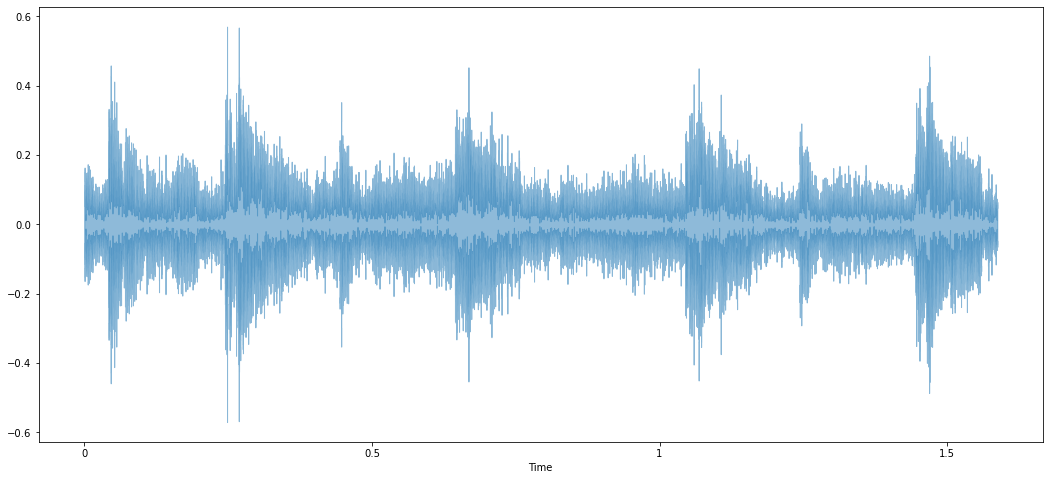

In [2]:
plt.figure(figsize=(18,8))
librosa.display.waveshow(song, sr=sr, alpha=0.5)
plt.show()

In [3]:
ft = sp.fft.fft(song)
magnitude = np.absolute(ft)
freq = np.linspace(0,sr,len(magnitude))

Text(0, 0.5, 'magnitude')

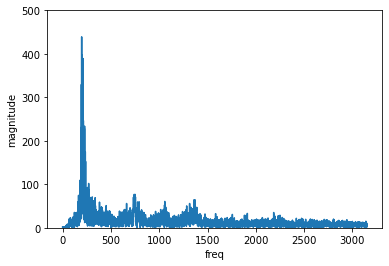

In [4]:
plt.figure()
plt.plot(freq[:5000], magnitude[:5000])
plt.ylim((0,500))
plt.xlabel("freq")
plt.ylabel("magnitude")

In [5]:
len(song) # how many samples

35000

In [6]:
max_m = 0
index = 0

for i in range(5000):
    if(magnitude[i]>max_m):
        index = i
        max_m = magnitude[i]
print(index)
print(f"freq: {freq[i]}")
print(librosa.hz_to_note(index))

314
freq: 3149.459984570988
D♯4


In [7]:
y, sr = librosa.load(song_path)
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo # this tempo is in bpm, beats per minute

C:\Users\scarl\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


array([151.99908088])

In [8]:
# tempo is 152, so each beat spans...
beat_len = 60/tempo[0]
beat_len # seconds per beat

0.39473922902494335

In [9]:
# so gotta take frames with this timings, determine their freq, then midi, then onto colour theory :D